In [1]:
import json
import os
import pandas as pd

In [2]:
list_files_example = os.listdir("data_example")
data_list = {}

for i, file in enumerate(list_files_example):
    if file != ".DS_Store":
        with open("data_example/" + file) as f:
            data_list[i] = json.load(f)

In [3]:
def transform_json_data_to_dataframe(json_data):
    data_field = json_data["data"]
    # Split fields in timestamp & value
    df_exploration = pd.DataFrame(list(map(lambda x: x.split(" "), data_field)), 
                                  columns= ["timestamp", "RrInterval"])

    # Cast value as int
    df_exploration["RrInterval"] = df_exploration["RrInterval"].apply(lambda x : int(x))

    # set cleaned timestamp as index
    df_exploration["timestamp"] = pd.to_datetime(df_exploration["timestamp"])
    df_exploration = df_exploration.set_index("timestamp")

    return df_exploration

In [4]:
for i in range(len(data_list)):
    try:
        print()
        print("fichier {}".format(i))
        df = transform_json_data_to_dataframe(data_list[i])
        print("Somme des RrInt (s): " + str(df["RrInterval"].sum() / 1000))
        print("Nombre de RrInt : " + str(df["RrInterval"].count()))
        timedelta = df.index[-1] - df.index[0]
        print("TimeDelta : " + str(timedelta))
        print("En secondes : " + str(timedelta.seconds))
        print(df.resample("1T").count())
        print()
        print("------------------------------------")
    except:
        print("Problem for " + "data_list[" + str(i) + "]")
        print()
        print("------------------------------------")
        pass


fichier 0
Somme des RrInt (s): 1003.24
Nombre de RrInt : 1000
TimeDelta : 0 days 00:17:20.892000
En secondes : 1040
                     RrInterval
timestamp                      
2018-07-05 16:14:00          41
2018-07-05 16:15:00          57
2018-07-05 16:16:00          60
2018-07-05 16:17:00          60
2018-07-05 16:18:00          59
2018-07-05 16:19:00          59
2018-07-05 16:20:00          59
2018-07-05 16:21:00          60
2018-07-05 16:22:00          58
2018-07-05 16:23:00          61
2018-07-05 16:24:00          58
2018-07-05 16:25:00          56
2018-07-05 16:26:00          61
2018-07-05 16:27:00          59
2018-07-05 16:28:00          55
2018-07-05 16:29:00          52
2018-07-05 16:30:00          49
2018-07-05 16:31:00          36

------------------------------------

fichier 1
Problem for data_list[1]

------------------------------------

fichier 2
Somme des RrInt (s): 718.438
Nombre de RrInt : 1000
TimeDelta : 0 days 00:16:38.998000
En secondes : 998
               

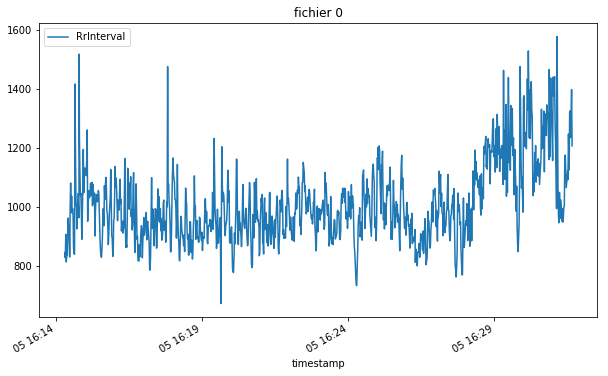

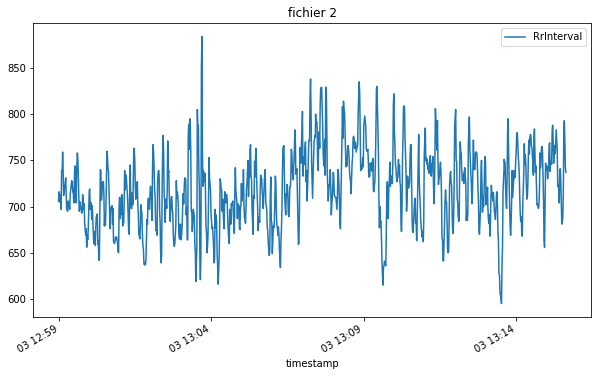

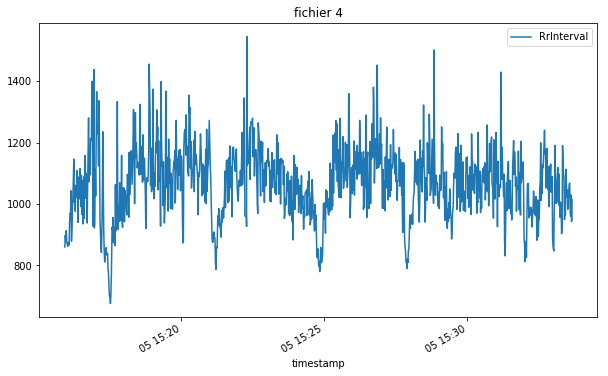

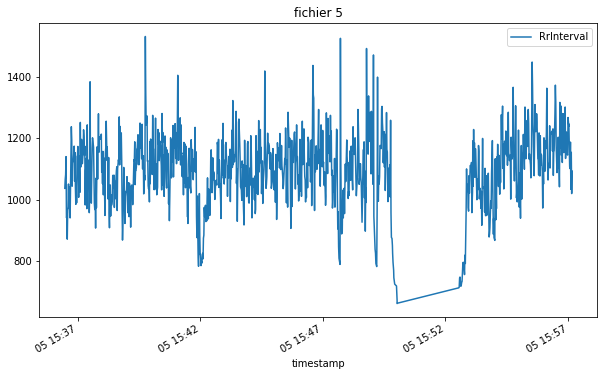

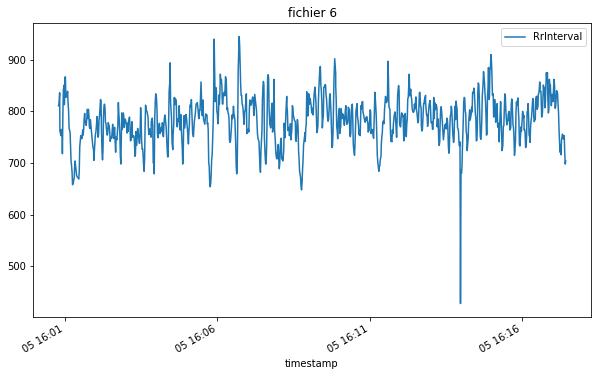

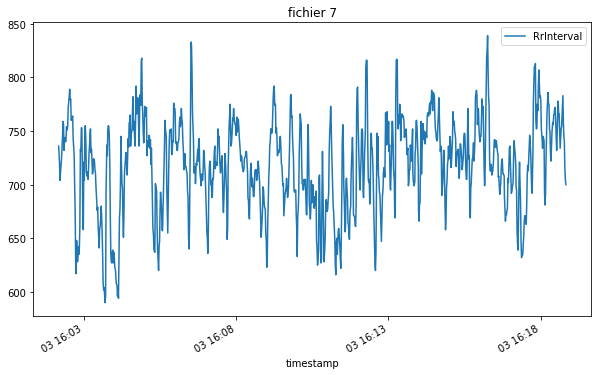

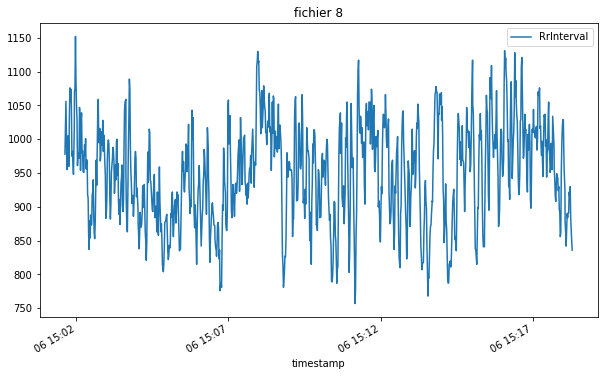

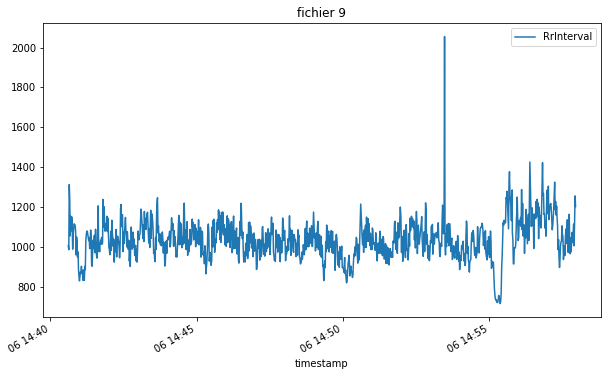

In [6]:
for i in range(len(data_list)):
    try:
        df = transform_json_data_to_dataframe(data_list[i])
        df.plot(figsize=(10, 6), title="fichier {}".format(i))
    except:
        pass